# Simple Topic Modeling
The Module developed below extracts Topic words from a corpus using LDA algorithm and Machine learning

## Table of Contents
0. [Import Libraries](#0)
1. [Load Data](#1)
2. [Select Required Columns](#2)
3. [Pre-Process Text](#3)
4. [Create Corpus](#4)
5. [Vectorize Word-Doc Relations](#5)
6. [Generate LDA model](#6)
7. [Fit LDA model to data](#7)
8. [Function to get Top n words](#9)
9. [Print topic words](#9)
10. [Generate Topic word cloud](#10)

## Import Libraries <a class="anchor" id="0"></a>

In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from modules.tweetToWords import tweetToWords
from dateutil.parser import parse
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import csr_matrix
from itertools import combinations
from tqdm.contrib import tzip
import sys
import csv
from pathlib import Path
from sklearn.metrics.pairwise import cosine_similarity


## 1 Load Data <a class="anchor" id="1"></a>

In [2]:
# read the csv file
csv_file = pd.read_csv('realdonaldtrump.csv')
csv_file.head()

,id,link,content,date,retweets,favorites,mentions,hashtags
0,1698308935,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,2009-05-04 13:54:25,510,917,NaN,NaN
1,1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,2009-05-04 20:00:10,34,267,NaN,NaN
2,1737479987,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 08:38:08,13,19,NaN,NaN
3,1741160716,https://twitter.com/realDonaldTrump/status/174...,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 15:40:15,11,26,NaN,NaN
4,1773561338,https://twitter.com/realDonaldTrump/status/177...,"""My persona will never be that of a wallflower...",2009-05-12 09:07:28,1375,1945,NaN,NaN


## 2 Select Required Columns <a class="anchor" id="2"></a>

In [3]:
# get selected cells from csv
data = csv_file[["content", "date", "retweets", "favorites"]]
data.head()

,content,date,retweets,favorites
0,Be sure to tune in and watch Donald Trump on L...,2009-05-04 13:54:25,510,917
1,Donald Trump will be appearing on The View tom...,2009-05-04 20:00:10,34,267
2,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 08:38:08,13,19
3,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 15:40:15,11,26
4,"""My persona will never be that of a wallflower...",2009-05-12 09:07:28,1375,1945


## 3 Pre-Process Text <a class="anchor" id="3"></a>

In [4]:
cleantext=[]
for item in tqdm(data['content']):
    words=tweetToWords(item)
    cleantext+=[words]
data['cleantext']=cleantext
data

100%|██████████| 43352/43352 [03:34<00:00, 202.10it/s]
C:\Users\mamat\AppData\Local\Temp/ipykernel_12196/1743885263.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cleantext']=cleantext


,content,date,retweets,favorites,cleantext
0,Be sure to tune in and watch Donald Trump on L...,2009-05-04 13:54:25,510,917,sure tune watch donald trump late night david ...
1,Donald Trump will be appearing on The View tom...,2009-05-04 20:00:10,34,267,donald trump appearing view tomorrow morning d...
2,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 08:38:08,13,19,donald trump read top ten financial tip late s...
3,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 15:40:15,11,26,new blog post celebrity apprentice finale less...
4,"""My persona will never be that of a wallflower...",2009-05-12 09:07:28,1375,1945,persona never wallflower rather build wall cli...
...,...,...,...,...,...
43347,Joe Biden was a TOTAL FAILURE in Government. H...,2020-06-17 19:00:32,23402,116377,joe biden total failure government bungled eve...
43348,Will be interviewed on @ seanhannity tonight a...,2020-06-17 19:11:47,11810,56659,interviewed seanhannity tonight enjoy
43349,pic.twitter.com/3lm1spbU8X,2020-06-17 21:27:33,4959,19344,
43350,pic.twitter.com/vpCE5MadUz,2020-06-17 21:28:38,4627,17022,


In [5]:
data.cleantext[5]

'miss usa tara conner fired always believer second chance say donald trump'

### Fix Date DataType

In [6]:
dates = []
for item in tqdm(data["date"]):
    year = parse(item).year
    dates+=[year]
data['date']=dates
data

100%|██████████| 43352/43352 [00:03<00:00, 13278.86it/s]
C:\Users\mamat\AppData\Local\Temp/ipykernel_12196/2385803758.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date']=dates


,content,date,retweets,favorites,cleantext
0,Be sure to tune in and watch Donald Trump on L...,2009,510,917,sure tune watch donald trump late night david ...
1,Donald Trump will be appearing on The View tom...,2009,34,267,donald trump appearing view tomorrow morning d...
2,Donald Trump reads Top Ten Financial Tips on L...,2009,13,19,donald trump read top ten financial tip late s...
3,New Blog Post: Celebrity Apprentice Finale and...,2009,11,26,new blog post celebrity apprentice finale less...
4,"""My persona will never be that of a wallflower...",2009,1375,1945,persona never wallflower rather build wall cli...
...,...,...,...,...,...
43347,Joe Biden was a TOTAL FAILURE in Government. H...,2020,23402,116377,joe biden total failure government bungled eve...
43348,Will be interviewed on @ seanhannity tonight a...,2020,11810,56659,interviewed seanhannity tonight enjoy
43349,pic.twitter.com/3lm1spbU8X,2020,4959,19344,
43350,pic.twitter.com/vpCE5MadUz,2020,4627,17022,


## 4 Create Corpus <a class="anchor" id="4"></a>

In [7]:
corpus = list(data.cleantext)
corpus[:5]

['sure tune watch donald trump late night david letterman present top ten list tonight',
 'donald trump appearing view tomorrow morning discus celebrity apprentice new book think like champion',
 'donald trump read top ten financial tip late show david letterman funny',
 'new blog post celebrity apprentice finale lesson learned along way',
 'persona never wallflower rather build wall cling donald trump']

## 5 Vectorize Word-Doc Relations <a class="anchor" id="5"></a>

In [8]:
vectorizer = CountVectorizer(min_df=2, max_df=0.9)
X = vectorizer.fit_transform(corpus)
vocabulary = vectorizer.get_feature_names()
vocabulary[:15]

['aa',
 'aaa',
 'aaafivediamond',
 'aaanews',
 'aacrowellt',
 'aaron',
 'aaronmcallorum',
 'aaszkler',
 'ab',
 'abandon',
 'abandoned',
 'abbas',
 'abbott',
 'abbydnyc',
 'abc']

In [9]:
X.shape

(43352, 14436)

In [10]:
print("\nThe vectorized array looks like:\n {}".format(X.toarray()))


The vectorized array looks like:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## 6 Generate LDA model <a class="anchor" id="6"></a>

In [16]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=10, max_iter=20,
                                learning_method = 'online',
                                learning_offset = 50.,
                                random_state = 0)
#n_components are the number of topics you want to classify.

## 7 Fit LDA model to data <a class="anchor" id="7"></a>

In [17]:
lda.fit(X)

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=20, random_state=0)

## 8 Function to get Top n words <a class="anchor" id="8"></a>

In [18]:
words=[]

def print_top_words(model, feature_names, n_top_words):
    for index, topic in enumerate(model.components_):
        message = "\nTopic{}:".format(index)
        message += " ".join([feature_names[i] for i in topic.argsort()[::-1][:n_top_words]])
        print(message)
        words.append(message)
        print("="*170)

## 9 Print topic words <a class="anchor" id="9"></a>

In [19]:
n_top_words = 40
print("\nTopics in LDA model: ")
tf_feature_names = vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)


Topics in LDA model: 

Topic0:president thanks state obama never much border would hillary done nothing house united republican made party said help crime totally medium white honor today crooked wrong left happy security iran give endorsement called vet running thought order pay could get

Topic1:realdonaldtrump trump big donald first show amazing please good best think great one know always hope way wow wait something ever going nancy talking cnn rating made could fired watch keep mark person open awesome david last minister someone choice

Topic2:thank country time even great also getting north making john fbi one around rating service given nytimes winner everyone interesting name story action politics southern fighting world farmer ready another set approval like course sleepy playing seen chuck congrats source

Topic3:trump america great new go need foxnews time news poll via donald today foxandfriends looking national interview campaign forward medium makeamericagreatagain pres

## 10 Generate Topic word cloud <a class="anchor" id="10"></a>

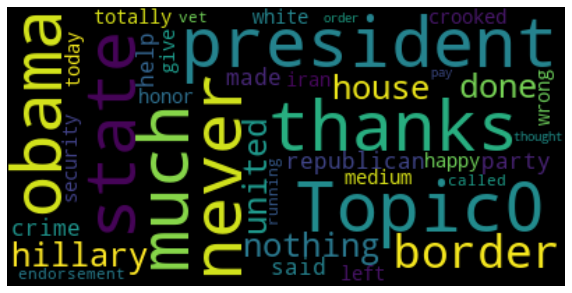

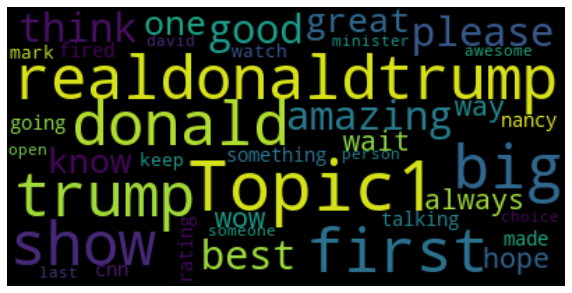

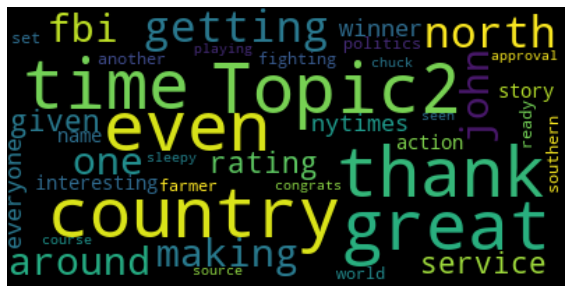

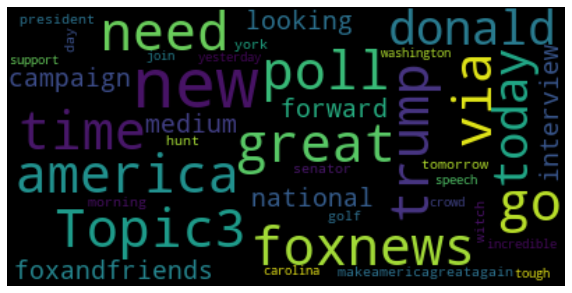

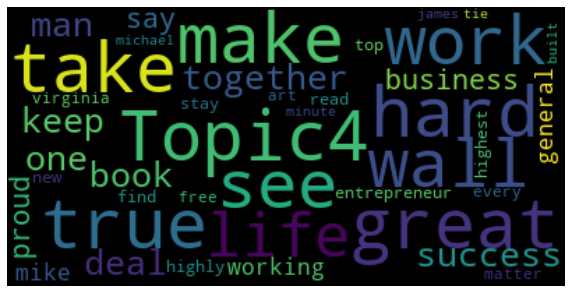

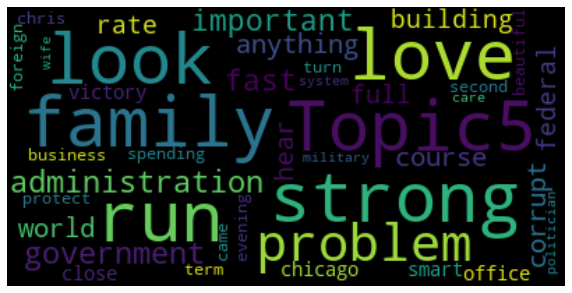

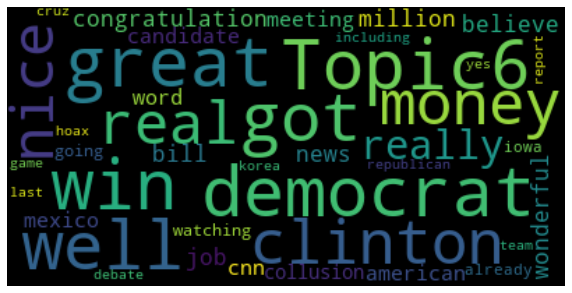

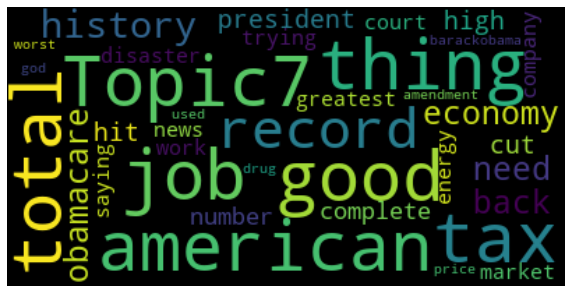

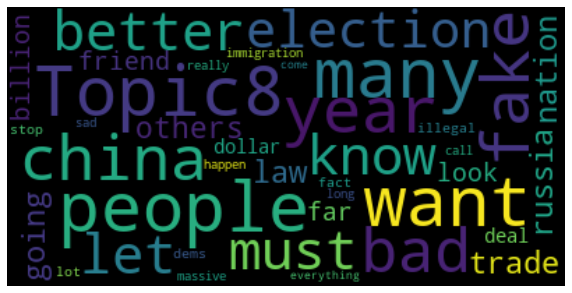

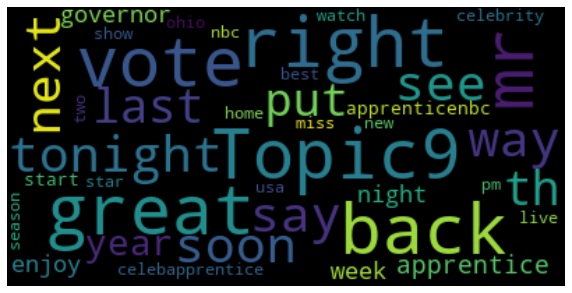

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for i in range(0,10):
    wordcloud = WordCloud(max_font_size=50, max_words=50).generate(words[i])

# Display the generated image:
    plt.figure(figsize=(10,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()